In [12]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
import numpy as np

just explaining markdown

In [18]:
# Load dataset
url = "D:/ML_dataScience/PyData/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)
dataset.shape
print(dataset)
# descriptions
print(dataset.describe())


     sepal-length  sepal-width  petal-length  petal-width           class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12            4.8          3.0        

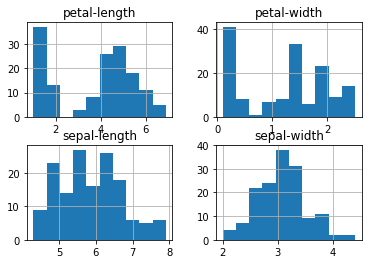

In [14]:
# histograms
dataset.hist()
plt.show()

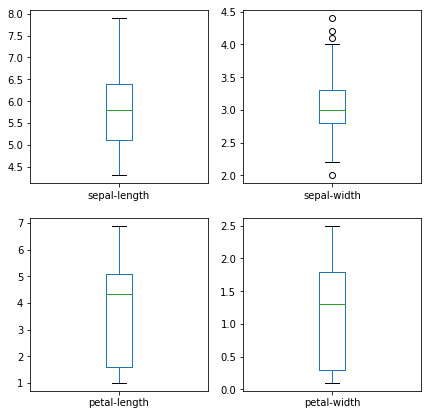

In [11]:
# Box plots

dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False, figsize=(7,7))
plt.show()

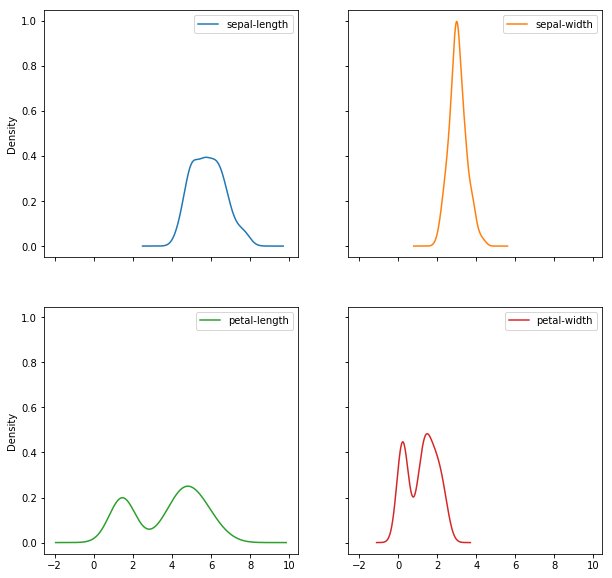

In [17]:
dataset.plot(kind='kde', subplots=True, layout=(2,2), sharex=True, sharey=True, figsize=(10,10))
plt.show()

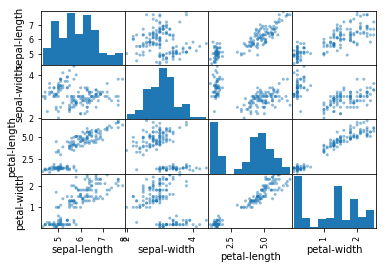

In [6]:
# scatter plot matrix
pandas.plotting.scatter_matrix(dataset)
plt.show()

In [20]:
# Split-out validation dataset
array = dataset.values
#print(array)
X = array[:,0:4]

Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)
#print(X_validation)
#print(X_train)
#priNnt(X_train.shape)

test_Data = [4.6,3.2,1.4,0.2]

In [21]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [29]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#Algorithm definitions/API's
index = 0

    

# evaluate each model in turn and store the performance metric in an array(model_perf)
results = []
names = []
model_perf = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    model_perf.append(cv_results.mean())
print("The best model is: ", max(model_perf))
bestModel_index = np.argmax(model_perf)
print(models[bestModel_index])

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
The best model is:  0.983333333333
('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))


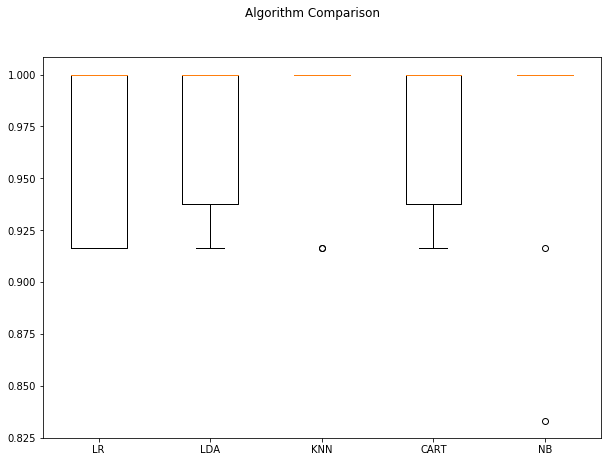

In [25]:

fig = plt.figure(figsize=(10,7))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [28]:
# Make predictions on validation dataset
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
predictions = logreg.predict(X_validation)

print("Accuracy score:")
print(accuracy_score(Y_validation, predictions))
print()

print("confusion_matrix:")
print(confusion_matrix(Y_validation, predictions))
print()

print("classification_report:")
print(classification_report(Y_validation, predictions))
print()

Accuracy score:
0.8

confusion_matrix:
[[ 7  0  0]
 [ 0  7  5]
 [ 0  1 10]]

classification_report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.88      0.58      0.70        12
 Iris-virginica       0.67      0.91      0.77        11

    avg / total       0.83      0.80      0.80        30


